# Find Models by Comparing Soggetti and Modules

### What can you do with this notebook?

This notebook measures the similarity between pieces based on their **shared soggetti** and **shared contrapuntal modules**.

There are two parts:

A **macro** view, in which we find percentages of shared soggetti and contrapuntal modules.

A **micro** view, in which we consider exactly which soggetti are shared, and how they are used in each pair of pieces.

The method first finds all the "entry" soggetti in each piece in your corpus, then measures the percentage of each model found in a corresponding Mass movement.  The resulting 'cross_plot' is a driving distance style of results (from 0 to 1) showing the relatedness of each pair of movements.

The specific number of times each soggetto appears is not considered, but rather the percentage of unique entries that each pair of pieces shares.


You can pass an entire corpus to the tool, which case every piece will be compared to every other.  

This method uses 'entries' (that is soggetti limited to those after section breaks, fermatas, or rests).  

The default length of soggetti is 4, but it can be set to any length by passing `n=6` (for example).

```
corpus = CorpusBase(corpus_list)
soggetto_cross_plot = corpus.modelFinder(n=6)
soggetto_cross_plot
```

It is also possible to divide your corpus into two segments:  models and Masses.  Doing so will result in a simpler table than for the previous method, comparing each model to each Mass movement (but not all pieces to each other).


Typical Use:

```
model_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei',
      'https://crimproject.org/mei/CRIM_Model_0011.mei',
     'https://crimproject.org/mei/CRIM_Model_0014.mei']
mass_list = ['https://crimproject.org/mei/CRIM_Mass_0008_1.mei',
     'https://crimproject.org/mei/CRIM_Mass_0008_2.mei',
      'https://crimproject.org/mei/CRIM_Mass_0008_3.mei']
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
soggetto_cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
soggetto_cross_plot
```

### How to Read the Results:

* As you read across, you will see the percentage of melodies in the row value that come from the corresponding column value.


### Heatmap Display of Results


It is possible to display the cross-plot matrix as a heatmap.  Darker colors represent stronger relationships between the corresponding pairs of pieces on the grid.

Typical Use:

```
dataplot = sns.heatmap(soggetto_cross_plot, cmap="YlGnBu", annot=False)
plt.show()
```

In [175]:
# import code

import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns


# Macro Level 

## 1.1 Import Corpus by Specifying Model and Mass IDs

In [176]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0032"  # <==  put your model number here!
mass_id = "0025" # <== put your Mass number here!
model = prefix + model_id + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
corpus_list

['https://crimproject.org/mei/CRIM_Model_0032.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_2.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_3.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_4.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_5.mei']

## 1.2 Import Corpus From List

In [67]:
# Or build a list by hand:
corpus_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei',
              'https://crimproject.org/mei/CRIM_Model_0011.mei',
             'https://crimproject.org/mei/CRIM_Model_0014.mei', 
              'https://crimproject.org/mei/CRIM_Mass_0008_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0008_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0008_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0008_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0008_5.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0009_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0009_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0009_5.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0012_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0012_3.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_4.mei',
    'https://crimproject.org/mei/CRIM_Mass_0012_5.mei']


In [119]:
# Or build a list by hand:
corpus_list = ["Music_Files/Gascoigne_Deus.musicxml", 
"Music_Files/Sermisy_Impetum.musicxml",
"Music_Files/Sermisy_Missa_Plumi_1.musicxml", 
"Music_Files/Sermisy_Missa_Plumi_2.musicxml", 
"Music_Files/Sermisy_Missa_Plumi_3.musicxml", 
"Music_Files/Sermisy_Missa_Plumi_5.musicxml"]

In [169]:
corpus = CorpusBase(corpus_list)
soggetto_cross_plot = corpus.modelFinder(n=4)
soggetto_cross_plot 

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0032,CRIM_Mass_0025_1,CRIM_Mass_0025_2,CRIM_Mass_0025_3,CRIM_Mass_0025_4,CRIM_Mass_0025_5
Mass,,,,,,
CRIM_Model_0032,1.000000,0.646341,0.817073,0.780488,0.487805,0.536585
CRIM_Mass_0025_1,0.833333,1.000000,0.738095,0.833333,0.476190,0.571429
CRIM_Mass_0025_2,0.544304,0.405063,1.000000,0.632911,0.405063,0.354430
CRIM_Mass_0025_3,0.438017,0.396694,0.545455,1.000000,0.297521,0.297521
CRIM_Mass_0025_4,0.369231,0.369231,0.538462,0.507692,1.000000,0.430769
CRIM_Mass_0025_5,0.487805,0.487805,0.414634,0.585366,0.414634,1.000000


###  1.2 The Melodic Matrix as Heatmap


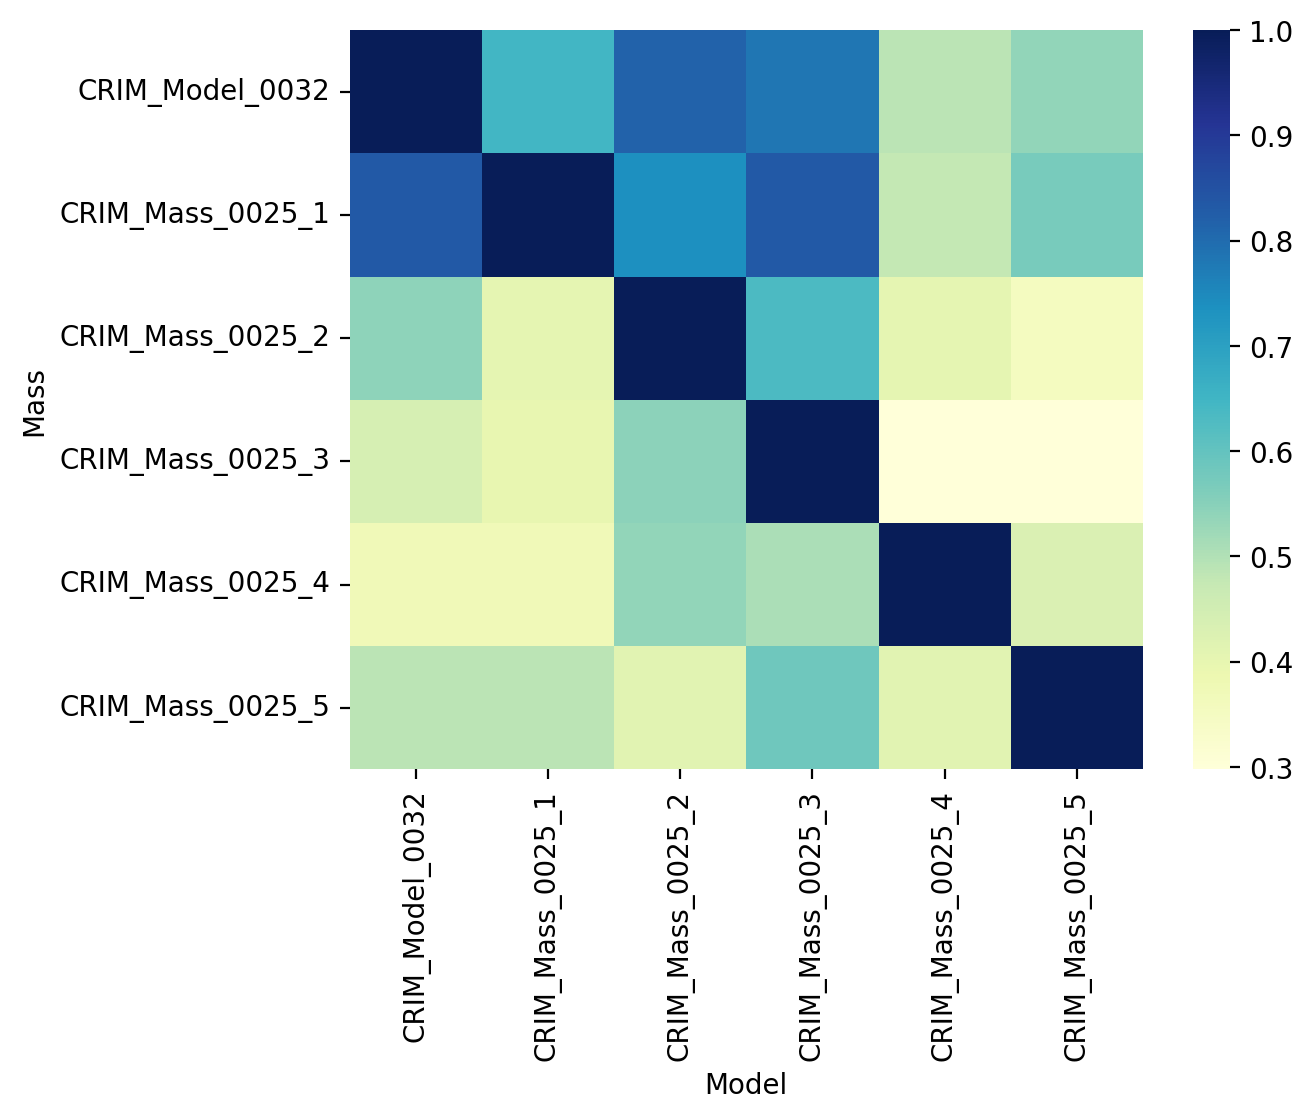

In [171]:
# melodic matrix
dataplot = sns.heatmap(soggetto_cross_plot, cmap="YlGnBu", annot=False)
plt.show()

## 1.3 Models and Masses as distinct sets 

Making separate model and mass lists makes things a bit neater, since don't compare pieces to themselves

```
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
cross_plot
```

In [122]:
model_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei',
              'https://crimproject.org/mei/CRIM_Model_0011.mei',
             'https://crimproject.org/mei/CRIM_Model_0014.mei']
mass_list = ['https://crimproject.org/mei/CRIM_Mass_0008_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0008_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0008_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0008_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0008_5.mei',
            'https://crimproject.org/mei/CRIM_Mass_0009_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0009_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0009_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0009_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0009_5.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_1.mei',
         'https://crimproject.org/mei/CRIM_Mass_0012_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0012_3.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0012_5.mei']             

In [123]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
model_matrix = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
model_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014
Mass,,,
CRIM_Mass_0008_1,0.657143,0.000000,0.514286
CRIM_Mass_0008_2,0.616667,0.033333,0.083333
CRIM_Mass_0008_3,0.292453,0.047170,0.160377
CRIM_Mass_0008_4,0.488372,0.000000,0.255814
CRIM_Mass_0008_5,0.325843,0.044944,0.224719
CRIM_Mass_0009_1,0.370370,0.222222,0.222222
CRIM_Mass_0009_2,0.355556,0.355556,0.044444
CRIM_Mass_0009_3,0.317647,0.305882,0.141176
CRIM_Mass_0009_4,0.478261,0.304348,0.086957


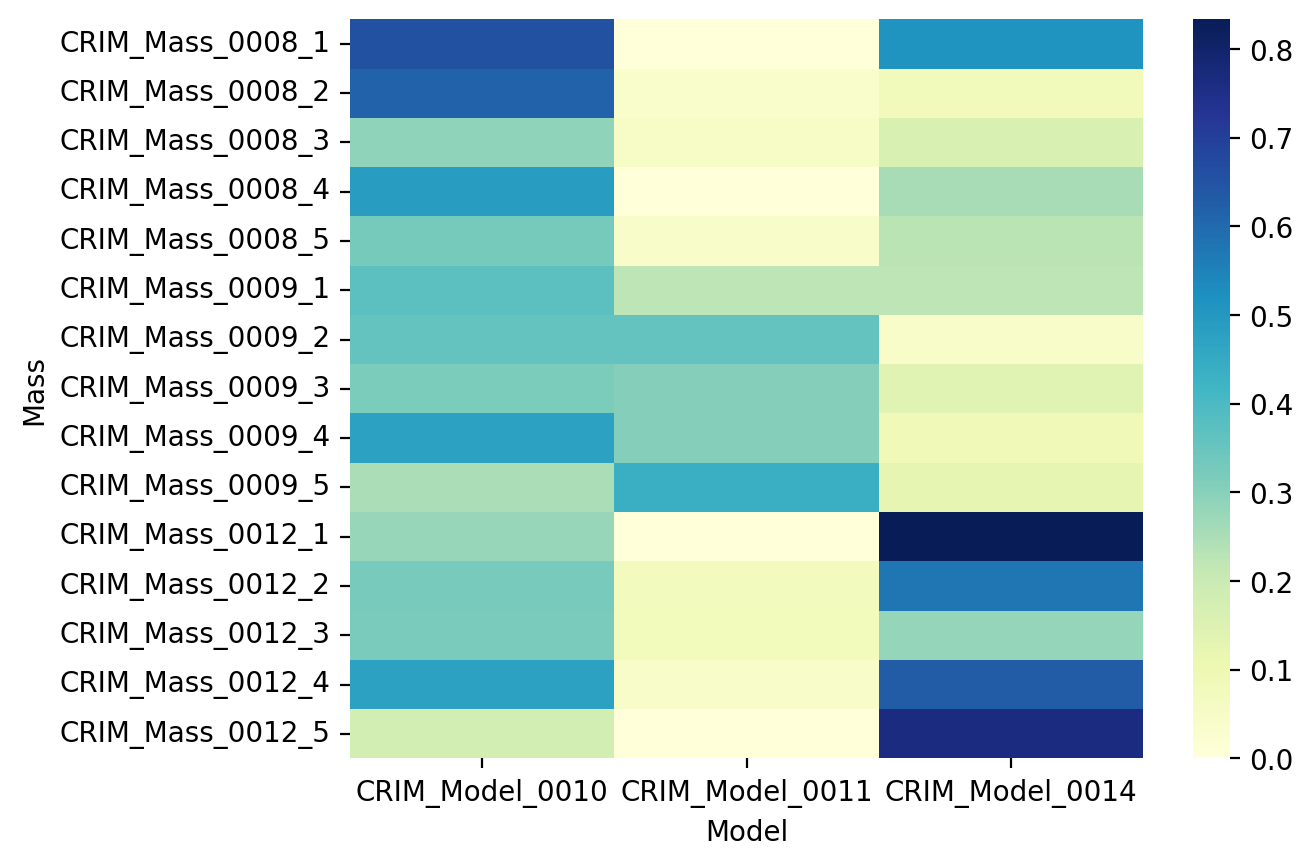

In [124]:
# melodic matrix
dataplot = sns.heatmap(model_matrix, cmap="YlGnBu", annot=False)
plt.show()


## 2 Contrapuntal (Modular) Ngrams as Similarity Matrix

**Contrapuntal Modules** are 'ngrams' that represent the motion of a pair of voices.  

This tool finds the patterns between every pair of voices, then filters these to correspond to the moments of the 'entries'.  So it tells us not only that there are shared melodies, but what is happening to the melodies in their contrapuntal context.

The `moduleFinder`  method identifies all of the `contrapuntal-modular ngrams` in each piece that **coincide with the melodic entries**.  These are the modules found in _all_ voices around the moment of the given melodic entry, so they will
include both the entries and other soggetti, too.

Lists of unique contrapuntal-ngrams are then compared across the corpus, resulting in a matrix of values.

This method in turn returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). 

Specifically, **the value is the percentage of each piece's
modular ngrams (the ones that occur at the moment of the entries) can be found in each of the other pieces in the corpus.**

### Typical Use

```
corpus = CorpusBase(corpus_list)
module_matrix = corpus.moduleFinder()
module_matrix
```

### Split Corpus for Mass and Model:

```
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_matrix = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_matrix
```

###  How to Read the Results:
    - As you read across, you will see the percentage of modular ngrams in the row value that come from the corresponding column value.  
   
   
### Heatmap Display of Matrix

```
dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()
```

### 2.1 Module Matrix

In [177]:
corpus = CorpusBase(corpus_list)
module_matrix = corpus.moduleFinder()
module_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0032,CRIM_Mass_0025_1,CRIM_Mass_0025_2,CRIM_Mass_0025_3,CRIM_Mass_0025_4,CRIM_Mass_0025_5
Mass,,,,,,
CRIM_Model_0032,1.000000,0.242515,0.287425,0.293413,0.212575,0.197605
CRIM_Mass_0025_1,0.211236,1.000000,0.267416,0.235955,0.262921,0.256180
CRIM_Mass_0025_2,0.267936,0.295754,1.000000,0.284041,0.285505,0.282577
CRIM_Mass_0025_3,0.313646,0.317719,0.316701,1.000000,0.313646,0.318737
CRIM_Mass_0025_4,0.281800,0.334638,0.332681,0.318982,1.000000,0.328767
CRIM_Mass_0025_5,0.266174,0.312384,0.303142,0.312384,0.310536,1.000000


### Module Matrix with Separate Corpus for Models and Masses

In [74]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_matrix = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014
Mass,,,
CRIM_Mass_0008_1,0.540816,0.369898,0.369898
CRIM_Mass_0008_2,0.547421,0.439268,0.449251
CRIM_Mass_0008_3,0.491361,0.448164,0.455724
CRIM_Mass_0008_4,0.475248,0.415842,0.415842
CRIM_Mass_0008_5,0.670479,0.646891,0.649750
CRIM_Mass_0009_1,0.277311,0.277311,0.252101
CRIM_Mass_0009_2,0.360169,0.338983,0.322034
CRIM_Mass_0009_3,0.360731,0.331050,0.303653
CRIM_Mass_0009_4,0.367568,0.308108,0.264865


### 1.6 Module Matrix as Heatmap


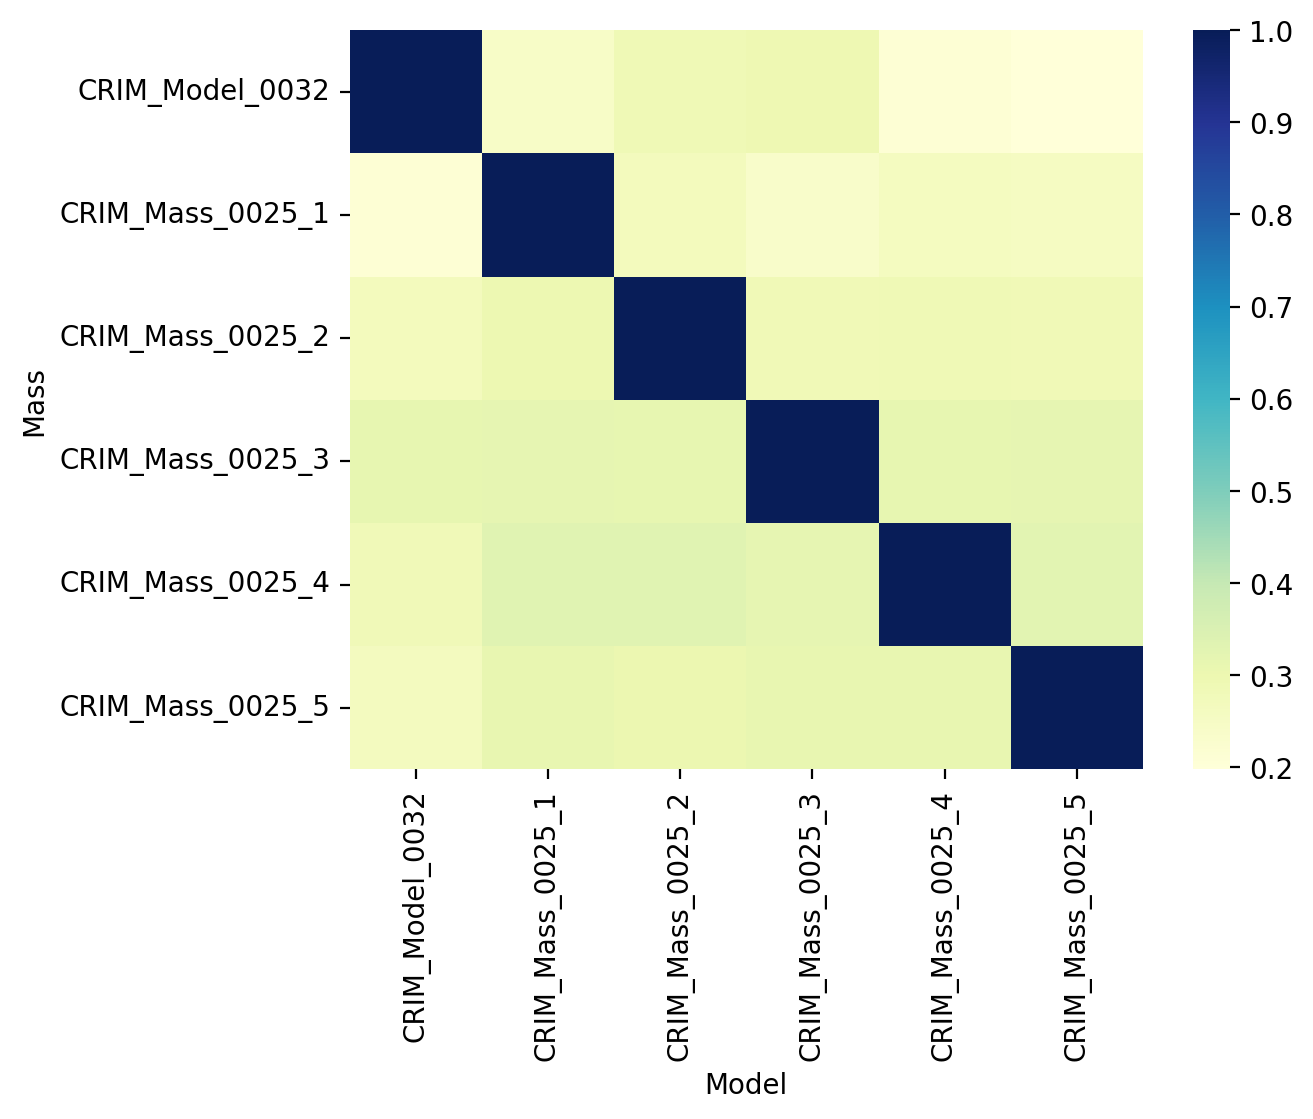

In [178]:
# module matrix

dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()

### 1.7. Module Matrix with Separate Lists of Models and Masses

Define the lists above

```
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_matrix = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_matrix
```

In [76]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_matrix = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014
Mass,,,
CRIM_Mass_0008_1,0.540816,0.369898,0.369898
CRIM_Mass_0008_2,0.547421,0.439268,0.449251
CRIM_Mass_0008_3,0.491361,0.448164,0.455724
CRIM_Mass_0008_4,0.475248,0.415842,0.415842
CRIM_Mass_0008_5,0.670479,0.646891,0.649750
CRIM_Mass_0009_1,0.277311,0.277311,0.252101
CRIM_Mass_0009_2,0.360169,0.338983,0.322034
CRIM_Mass_0009_3,0.360731,0.331050,0.303653
CRIM_Mass_0009_4,0.367568,0.308108,0.264865


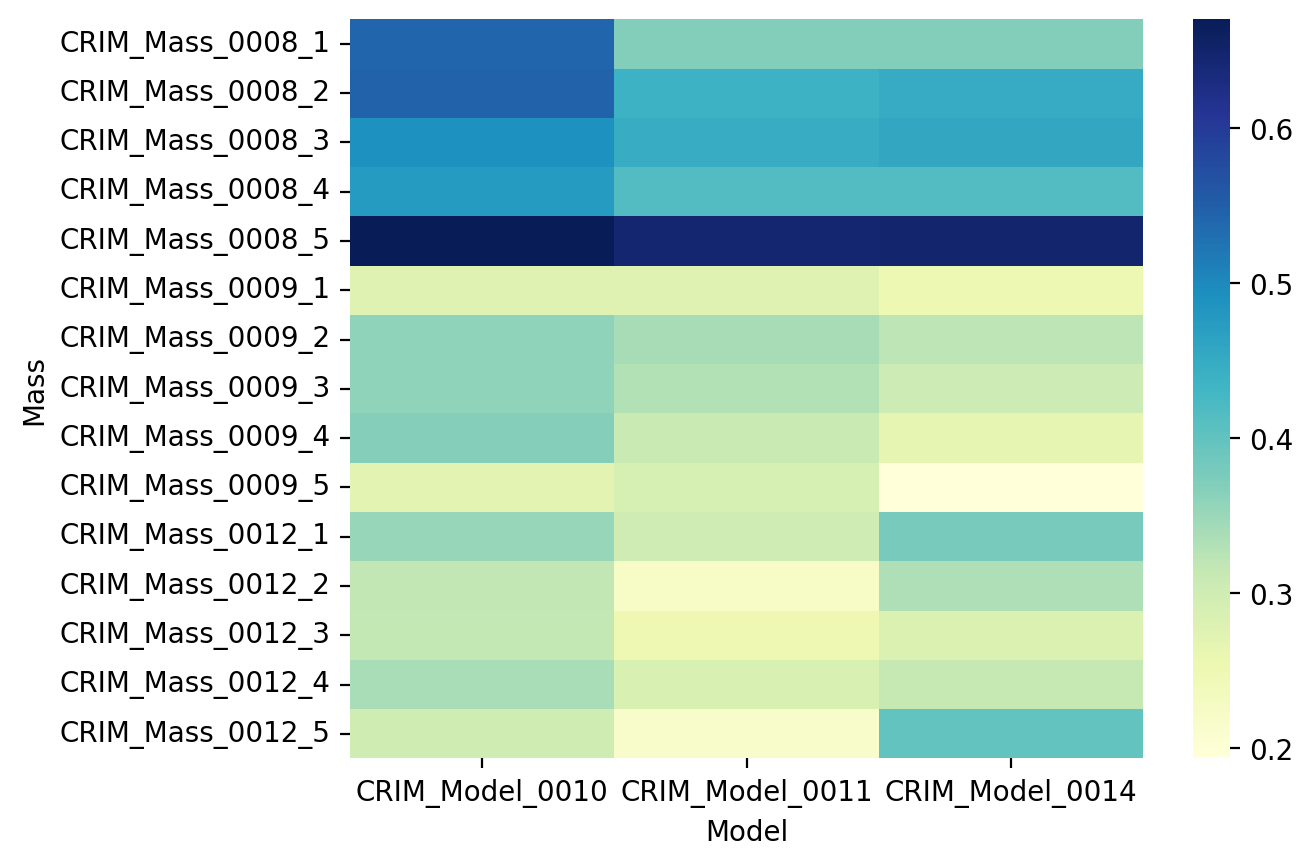

In [77]:
# melodic matrix
dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()

### Compare the Differences between the Model Finder and Module Finder outputs

This shows the movement between the two matching tables.  The higher the number, the more transformation is apparent.

In [179]:
comparison_table = module_matrix.compare(soggetto_cross_plot).round(2)
comparison_table

Model            CRIM_Model_0032       CRIM_Mass_0025_1        \
                            self other             self other   
Mass                                                            
CRIM_Model_0032              NaN   NaN             0.24  0.65   
CRIM_Mass_0025_1            0.21  0.83              NaN   NaN   
CRIM_Mass_0025_2            0.27  0.54             0.30  0.41   
CRIM_Mass_0025_3            0.31  0.44             0.32  0.40   
CRIM_Mass_0025_4            0.28  0.37             0.33  0.37   
CRIM_Mass_0025_5            0.27  0.49             0.31  0.49   

Model            CRIM_Mass_0025_2       CRIM_Mass_0025_3        \
                             self other             self other   
Mass                                                             
CRIM_Model_0032              0.29  0.82             0.29  0.78   
CRIM_Mass_0025_1             0.27  0.74             0.24  0.83   
CRIM_Mass_0025_2              NaN   NaN             0.28  0.63   
CRIM_Mass_0025_3             0.32  0.55              NaN   NaN   
CRIM_Mass_0025_4             0.33  0.54             0.32  0.51   
CRIM_Mass_0025_5             0.30  0.41             0.31  0.59   

Model            CRIM_Mass_0025_4       CRIM_Mass_0025_5        
                             self other             self other  
Mass                                                            
CRIM_Model_0032              0.21  0.49             0.20  0.54  
CRIM_Mass_0025_1             0.26  0.48             0.26  0.57  
CRIM_Mass_0025_2             0.29  0.41             0.28  0.35  
CRIM_Mass_0025_3             0.31  0.30             0.32  0.30  
CRIM_Mass_0025_4              NaN   NaN             0.33  0.43  
CRIM_Mass_0025_5             0.31  0.41              NaN   NaN

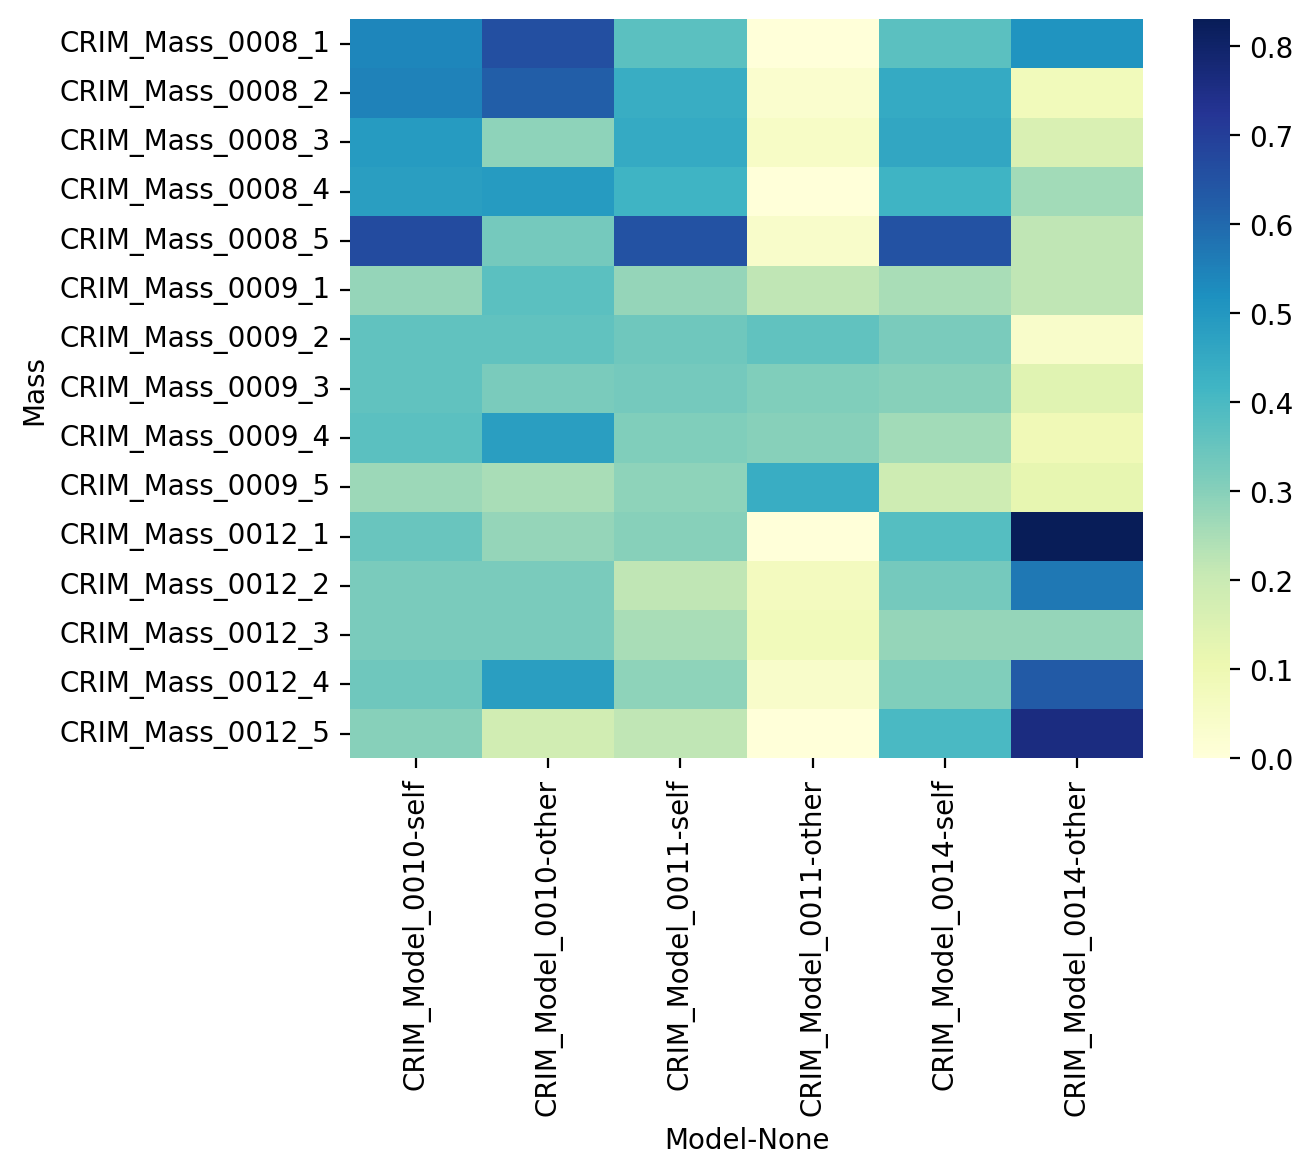

In [79]:
# melodic matrix
dataplot = sns.heatmap(comparison_table, cmap="YlGnBu", annot=False)
plt.show()

# Micro Level

#### Here we explore _where_ and _how_ the shared melodies are presented in each piece

* Load a specific pair of closely related pieces from your corpus
* Find exactly which melodic entries are shared
* Find out *where* these melodies occur in each piece
* Check the Fuga, PEN, and ID Presentation Types to see how the melodies are treated in each piece.  Pick one or two melodies (and Presentation Types) as examples to describe.

In [185]:
corpus_list


['https://crimproject.org/mei/CRIM_Model_0032.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_2.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_3.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_4.mei',
 'https://crimproject.org/mei/CRIM_Mass_0025_5.mei']

In [206]:
# Specify the Model
model = corpus_list[0] # <== the model will be score "0"
model = importScore(model)

# Specify the Mass Movement(s)
mass_movement = corpus_list[1] # <== select the index number of your mass from the corpus.  "1" is the Kyrie, "5" is the Agnus
mass_movement = importScore(mass_movement)
print(model.metadata, mass_movement.metadata)

Previously imported piece detected.
Previously imported piece detected.
{'title': 'Sancta et immaculata virginitas', 'composer': 'Cristóbal de Morales'} {'title': 'Missa Sancta et immaculata virginitas: Kyrie', 'composer': 'Francisco Guerrero'}


### Get the Entries and Detailed Index for A Pair of Pieces


In [207]:
# for the model
model_entries = model.entries(thematic=True, anywhere=True, n=4)
# model_entries = model_entries.applymap(convertTuple)
model_entries_det = model.detailIndex(model_entries, offset=True, progress=True)

# for the mass movement
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
# mass_movement_entries = mass_movement_entries.applymap(convertTuple)
mass_movement_entries_det = mass_movement.detailIndex(mass_movement_entries, offset=True, progress=True)

# check the detailed view as needed for each
model_entries_det
# mass_movement_entries_det

Superius            Altus  \
Measure Beat Offset Progress                                      
1       1.0  0.0    0.000000               NaN              NaN   
3       1.0  16.0   0.014235               NaN              NaN   
5       1.0  32.0   0.028470               NaN  (-5, 5, -2, -2)   
        2.0  34.0   0.030249               NaN              NaN   
        3.0  36.0   0.032028               NaN              NaN   
...                                        ...              ...   
137     4.0  1094.0 0.973310               NaN              NaN   
138     2.0  1098.0 0.976868    (2, -3, 2, -5)              NaN   
139     4.0  1110.0 0.987544  (-2, -2, -2, -2)              NaN   
140     1.5  1113.0 0.990214  (-2, -2, -2, -2)              NaN   
        2.0  1114.0 0.991103  (-2, -2, -2, -2)              NaN   

                                        Tenor          Bassus  
Measure Beat Offset Progress                                   
1       1.0  0.0    0.000000   (-5, 5, -3, 4)             NaN  
3       1.0  16.0   0.014235              NaN  (-5, 5, -3, 4)  
5       1.0  32.0   0.028470   (2, -2, 2, -2)             NaN  
        2.0  34.0   0.030249  (-2, 2, -2, -2)             NaN  
        3.0  36.0   0.032028  (2, -2, -2, -2)             NaN  
...                                       ...             ...  
137     4.0  1094.0 0.973310   (2, -3, 2, -2)             NaN  
138     2.0  1098.0 0.976868              NaN             NaN  
139     4.0  1110.0 0.987544              NaN             NaN  
140     1.5  1113.0 0.990214              NaN             NaN  
        2.0  1114.0 0.991103              NaN             NaN  

[255 rows x 4 columns]

#### Find the nGrams shared by your pieces

In [208]:

model_entries = model.entries(thematic=True, anywhere=True, n=4)
model_entries_stack = model_entries.stack()
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
mass_movement_entries_stack = mass_movement_entries.stack()
shared_entries = list(set(mass_movement_entries_stack).intersection(model_entries_stack))
shared_entries = shared_entries[:]
shared_entries


[('-2', '-2', '2', '-5'),
 ('2', '-2', '4', '-2'),
 ('5', '-2', '2', '2'),
 ('2', '-3', '2', '-5'),
 ('-2', '2', '-2', '-2'),
 ('2', '-3', '2', '-2'),
 ('4', '-2', '2', '2'),
 ('-5', '5', '-3', '4')]

##  Make a Heatmap of Shared Entries in Two Pieces

* Let's look at **where** the shared melodies appear in each of your pieces.

* Judging only from the visualization, where do the shared melodies appear, and how similar does the treatment of them seem to be?

#### Note that you can also decide to compare one MASS movement with another MASS movement!

### Model Heatmap

In [209]:
## Use this for the Model Heatmap

nr = model.notes(combineUnisons=True) 
mel = model.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = model.ngrams(df=mel, n=4)
entry_ngrams = model.entries(df=mel, n=4)
mel_ngrams_duration = model.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[], includeCount=False)


alt.Chart(...)

### Mass Movement Heatmap

In [210]:
## Use this for the Mass Movement Heatmap

nr = mass_movement.notes(combineUnisons=True) 
mel = mass_movement.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = mass_movement.ngrams(df=mel, n=4)
entry_ngrams = mass_movement.entries(df=mel, n=4)
mel_ngrams_duration = mass_movement.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[], includeCount=False)


alt.Chart(...)

### Make the Short Lists of These Shared Ngrams and Their Offsets

In [157]:
# for the model
model_short_list = model_entries_det[model_entries_det.isin(shared_entries)].dropna(how='all').stack()
model_offsets_of_shared_entries = model_short_list.index.get_level_values(2)
model_offsets_of_shared_entries = model_offsets_of_shared_entries.unique()

# for the mass movement
mass_movement_short_list = mass_movement_entries_det[mass_movement_entries_det.isin(shared_entries)].dropna(how='all').stack()
mass_movement_offsets_of_shared_entries = mass_movement_short_list.index.get_level_values(2)
mass_movement_offsets_of_shared_entries = mass_movement_offsets_of_shared_entries.unique()

model_offsets_of_shared_entries

Float64Index([   4.0,   40.0,   56.0,   68.0,   74.0,   76.0,   79.0,   80.0,
                82.0,   84.0,
              ...
              1270.0, 1272.0, 1276.0, 1280.0, 1284.0, 1296.0, 1300.0, 1304.0,
              1308.0, 1314.0],
             dtype='float64', name='Offset', length=256)

### Get Shared Entries as Presentation Types

* Note that not all shared entries will be used as Fuga, ID, and PEN but for those that appear in a pair of pieces, it can be informative to compare **how** they are treated!



In [166]:
# here we filter the PTypes to include ONLY those found in both the model and Mass movement

# here for the model
model_p_types = model.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)

model_shared_entry_ptypes = model_p_types[model_p_types.First_Offset.isin(model_offsets_of_shared_entries)]

# here for the Mass movement


mass_movement_p_types = mass_movement.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)


mass_movement_shared_entry_ptypes = mass_movement_p_types[mass_movement_p_types.First_Offset.isin(mass_movement_offsets_of_shared_entries)]
combined_ptypes = pd.concat([model_shared_entry_ptypes, mass_movement_shared_entry_ptypes])
combined_ptypes.head()

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
0,Mathieu Gascongne,Deus regnorum,140.0,"[18/1.0, 18/3.0, 23/3.0, 24/3.0]","[P5, P-12, P5]","[140.0, 144.0, 184.0, 192.0]","[(-2, -3, 2, 2)]","[4.0, 40.0, 8.0]","[[Contratenor], [Superius], [Bassus], [Tenor]]",FUGA,4,False,0.0,None,0
1,Mathieu Gascongne,Deus regnorum,256.0,"[32/3.0, 36/3.0]",[P1],"[256.0, 288.0]","[(2, 2, -3, 2)]",[32.0],"[[Contratenor], [Contratenor]]",FUGA,2,False,0.0,None,1
2,Mathieu Gascongne,Deus regnorum,322.0,"[40/4.0, 41/2.0]",[P-4],"[322.0, 326.0]","[(3, -2, -2, 2), (2, -2, -2, 2)]",[4.0],"[[Tenor], [Bassus]]",FUGA,2,True,0.0,None,0
3,Mathieu Gascongne,Deus regnorum,370.0,"[46/4.0, 48/2.0]",[P5],"[370.0, 382.0]","[(-2, -2, -2, -2)]",[12.0],"[[Bassus], [Tenor]]",FUGA,2,False,0.0,None,0
4,Mathieu Gascongne,Deus regnorum,414.0,"[52/2.0, 53/4.0]",[P-5],"[414.0, 426.0]","[(-3, 2, 2, -3)]",[12.0],"[[Superius], [Contratenor]]",FUGA,2,False,0.0,None,0


### Now, Sort the Results so we see the Shared Melodies Together


In [159]:
combined_ptypes.sort_values('Soggetti')

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
4,Claudin de Sermisy,Missa Plurium Motettorum: Gloria,258.0,"[40/7.0, 41/3.0]",[P5],"[258.0, 262.0]","[(-2, -2, -2, -2)]",[4.0],"[Bassus, Tenor]",FUGA,2,False,0.0,None,0
3,Mathieu Gascongne,Deus regnorum,370.0,"[46/4.0, 48/2.0]",[P5],"[370.0, 382.0]","[(-2, -2, -2, -2)]",[12.0],"[[Bassus], [Tenor]]",FUGA,2,False,0.0,None,0
11,Mathieu Gascongne,Deus regnorum,1260.0,"[157/1.0, 159/3.0, 160/1.0, 163/1.0]","[P8, P-8, P1]","[1260.0, 1280.0, 1284.0, 1308.0]","[(-2, -2, -2, 2)]","[20.0, 4.0, 24.0]","[[Tenor], [Superius], [Tenor], [Tenor]]",FUGA,4,False,0.0,None,1
6,Claudin de Sermisy,Missa Plurium Motettorum: Gloria,422.0,"[60/2.0, 60/2.0]",[P5],"[422.0, 426.0]","[(-2, -2, -2, 2)]",[4.0],"[Altus, Superius]",FUGA,2,False,0.0,None,0
6,Mathieu Gascongne,Deus regnorum,602.0,"[74/4.0, 75/2.0]",[P-5],"[602.0, 606.0]","[(-2, -2, -2, 2)]",[4.0],"[[Superius], [Contratenor]]",FUGA,2,False,0.0,None,0
1,Claudin de Sermisy,Missa Plurium Motettorum: Gloria,98.0,"[12/7.0, 13/3.0, 14/3.0, 15/3.0]","[P5, P-12, P4]","[98.0, 102.0, 114.0, 118.0]","[(-2, -3, 2, 2)]","[4.0, 12.0, 4.0]","[Altus, Superius, Bassus, Tenor]",ID,4,False,0.0,None,0
0,Mathieu Gascongne,Deus regnorum,140.0,"[18/1.0, 18/3.0, 23/3.0, 24/3.0]","[P5, P-12, P5]","[140.0, 144.0, 184.0, 192.0]","[(-2, -3, 2, 2)]","[4.0, 40.0, 8.0]","[[Contratenor], [Superius], [Bassus], [Tenor]]",FUGA,4,False,0.0,None,0
10,Mathieu Gascongne,Deus regnorum,1014.0,"[126/2.0, 134/2.0]",[P1],"[1014.0, 1078.0]","[(-2, 2, -2, -2)]",[64.0],"[[Contratenor], [Tenor]]",FUGA,2,False,0.0,None,1
4,Mathieu Gascongne,Deus regnorum,414.0,"[52/2.0, 53/4.0]",[P-5],"[414.0, 426.0]","[(-3, 2, 2, -3)]",[12.0],"[[Superius], [Contratenor]]",FUGA,2,False,0.0,None,0
3,Claudin de Sermisy,Missa Plurium Motettorum: Gloria,246.0,"[39/3.0, 40/3.0]",[P-5],"[246.0, 254.0]","[(-3, 2, 2, -3)]",[8.0],"[Superius, Altus]",FUGA,2,False,0.0,None,0


## Print With Verovio

Here you will need to send one piece at a time, using the output from above:

```
model.verovioPtypes(model_shared_entry_ptypes)
```

In [164]:
model.verovioPtypes(mass_movement_p_types)

Results:
File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 1-9
Presentation Type:  FUGA
Voices:  ['Tenor', 'Altus']
Number of Entries:  2
Soggetti:  [('5', '-2', '-2', '-2'), ('3', '-2', '-2', '-2'), ('4', '-2', '-2', '-2')]
Melodic Entry Intervals:  ['P5']
Time Entry Intervals:  [36.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 1


[Warning] MusicXML import: Unsupported direction-type 'other-direction'
[Warning] MusicXML import: Unsupported direction-type 'other-direction'
[Warning] MusicXML import: Unsupported direction-type 'other-direction'
[Warning] MusicXML import: Unsupported direction-type 'other-direction'
[Warning] MusicXML import: Unsupported direction-type 'other-direction'
[Warning] MusicXML import: Unsupported direction-type 'other-direction'
[Warning] MusicXML import: Unsupported direction-type 'other-direction'
[Warning] MusicXML import: Unsupported direction-type 'other-direction'


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 12-19
Presentation Type:  ID
Voices:  ['Altus', 'Superius', 'Bassus', 'Tenor']
Number of Entries:  4
Soggetti:  [('-2', '-3', '2', '2')]
Melodic Entry Intervals:  ['P5', 'P-12', 'P4']
Time Entry Intervals:  [4.0, 12.0, 4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 21-37
Presentation Type:  FUGA
Voices:  ['Bassus', 'Tenor', 'Bassus']
Number of Entries:  3
Soggetti:  [('3', '-2', '-2', '2')]
Melodic Entry Intervals:  ['M6', 'P-4']
Time Entry Intervals:  [56.0, 12.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 39-44
Presentation Type:  FUGA
Voices:  ['Superius', 'Altus']
Number of Entries:  2
Soggetti:  [('-3', '2', '2', '-3')]
Melodic Entry Intervals:  ['P-5']
Time Entry Intervals:  [8.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 40-45
Presentation Type:  FUGA
Voices:  ['Bassus', 'Tenor']
Number of Entries:  2
Soggetti:  [('-2', '-2', '-2', '-2')]
Melodic Entry Intervals:  ['P5']
Time Entry Intervals:  [4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 42-57
Presentation Type:  FUGA
Voices:  ['Superius', 'Altus', 'Superius', 'Tenor', 'Bassus', 'Superius']
Number of Entries:  6
Soggetti:  [('2', '2', '2', '-2'), ('3', '2', '2', '-2')]
Melodic Entry Intervals:  ['P-5', 'P5', 'P-8', 'P-5', 'M10']
Time Entry Intervals:  [4.0, 34.0, 22.0, 4.0, 14.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 60-64
Presentation Type:  FUGA
Voices:  ['Altus', 'Superius']
Number of Entries:  2
Soggetti:  [('-2', '-2', '-2', '2')]
Melodic Entry Intervals:  ['P5']
Time Entry Intervals:  [4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 76-82
Presentation Type:  FUGA
Voices:  ['Bassus', 'Tenor']
Number of Entries:  2
Soggetti:  [('2', '2', '-2', '4')]
Melodic Entry Intervals:  ['P5']
Time Entry Intervals:  [16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 103-116
Presentation Type:  FUGA
Voices:  ['Superius', 'Superius', 'Tenor']
Number of Entries:  3
Soggetti:  [('3', '-2', '-2', '-2'), ('2', '-2', '-2', '-2'), ('4', '-2', '-2', '-2')]
Melodic Entry Intervals:  ['M3', 'M-6']
Time Entry Intervals:  [26.0, 44.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 106-116
Presentation Type:  FUGA
Voices:  ['Superius', 'Tenor']
Number of Entries:  2
Soggetti:  [('3', '-2', '-2', '-2'), ('2', '-2', '-2', '-2')]
Melodic Entry Intervals:  ['M-6']
Time Entry Intervals:  [44.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 122-132
Presentation Type:  FUGA
Voices:  ['Superius', 'Bassus', 'Bassus']
Number of Entries:  3
Soggetti:  [('3', '-2', '-2', '-2'), ('2', '-2', '-2', '-2')]
Melodic Entry Intervals:  ['P-12', 'P4']
Time Entry Intervals:  [28.0, 30.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 126-134
Presentation Type:  FUGA
Voices:  ['Altus', 'Altus']
Number of Entries:  2
Soggetti:  [('-2', '2', '-5', '2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [48.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 127-135
Presentation Type:  FUGA
Voices:  ['Superius', 'Superius']
Number of Entries:  2
Soggetti:  [('-2', '2', '2', '-2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [48.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 130-138
Presentation Type:  FUGA
Voices:  ['Bassus', 'Bassus']
Number of Entries:  2
Soggetti:  [('-3', '2', '-2', '4')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [48.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  Gascoigne_Deus
Mathieu Gascongne
Deus regnorum
Measures: 130-139
Presentation Type:  FUGA
Voices:  ['Tenor', 'Tenor']
Number of Entries:  2
Soggetti:  [('2', '-3', '3', '2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [48.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1
